### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





# Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [30]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [156]:
#Lets examine the dataset
data.shape
#We see (12684 rows , 26 columns)

#Lets get the information about the dataset
data.info()

#We can see all column names, data types, Non Null counts etc



<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

In [ ]:
# Lets examine for missing values in the dataset
# This returns the count of null values for each column
data.isnull().sum()


#This gives us all columns and total number of rows having null values
#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Looking at car column as it mostly null, we can totally ignore that column from dataset for our analysis purpose
# Whereas other columns such as Bar CoffeHouse CarryAway RestaurantLessThan20 and Restaurant20To50 looks fine having less null values 

#Lets drop the 'car' column
data = data.drop('car', axis = 1)



In [132]:
#Lets check the shape again
data.shape

(12007, 25)

In [133]:
#Lets check for any duplicate rows 
duplicates = data.duplicated().sum()
print('No of duplicate records is', duplicates)

#We found 74 rows duplicate that can be removed

No of duplicate records is 0


In [134]:
#Lets remove duplicates
allrecords = data.shape[0]
data = data.drop_duplicates()

In [135]:
#Lets check the shape again
data.shape
print('Removed duplicate records:',allrecords - data.shape[0])
print(data.shape)

Removed duplicate records: 0
(12007, 25)


In [136]:
#Now we will remove rows that have missing values
data = data.dropna()

In [137]:
#Lets check shape again
data.shape

(12007, 25)

4. What proportion of the total observations chose to accept the coupon?



In [138]:
#Total observations that accepted coupon
noOfYes = data[['Y']].sum()
totalRecords = data.shape[0]
proportion = noOfYes / totalRecords

print(f"No of acceptance {noOfYes} ")
print(f"Total Observations {totalRecords}")
print(f"Proportion of Observations that chose to accept the coupon {proportion}")
print(f"Proportion Percentage {proportion * 100}")


No of acceptance Y    6825
dtype: int64 
Total Observations 12007
Proportion of Observations that chose to accept the coupon Y    0.568418
dtype: float64
Proportion Percentage Y    56.841842
dtype: float64


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Distribution of Coupons')

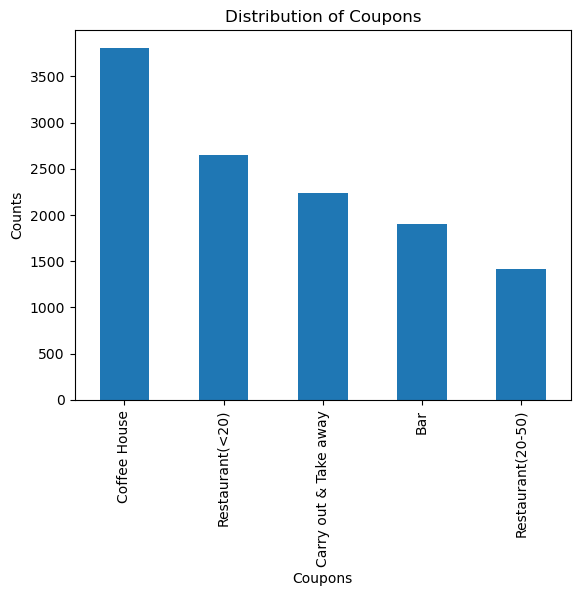

In [143]:
data['coupon'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Coupons')
plt.ylabel('Counts')
plt.title('Distribution of Coupons')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

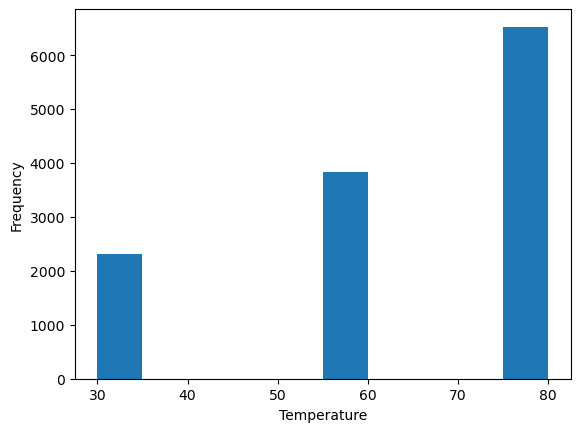

In [43]:
#data.hist('temperature')

data['temperature'].plot.hist()
plt.xlabel("Temperature")
plt.ylabel("Frequency")



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [145]:
#Dataframe that contains only 'bar coupons'
bar_coupons = data[data['coupon']=='Bar'].copy()



total_no_of_records_bar_coupon: 1906


2. What proportion of bar coupons were accepted?

In [155]:
#No of bar coupons accepted
total_no_of_records_bar_coupon = bar_coupons.shape[0]
print(f"total_no_of_records_bar_coupon: {total_no_of_records_bar_coupon}")

no_of_bar_coupons_accepted = bar_coupons[bar_coupons['Y'] == 1]['Y'].sum()
print(f"no_of_bar_coupons_accepted {no_of_bar_coupons_accepted}")

proportion_of_bar_coupons_accepted = no_of_bar_coupons_accepted / total_no_of_records_bar_coupon
print(f"proportion_of_bar_coupons_accepted {proportion_of_bar_coupons_accepted}")
print(f"proportion_of_bar_coupons_accepted in percentage {proportion_of_bar_coupons_accepted * 100}")


total_no_of_records_bar_coupon: 1906
no_of_bar_coupons_accepted 785
proportion_of_bar_coupons_accepted 0.4118572927597062
proportion_of_bar_coupons_accepted in percentage 41.185729275970616


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [171]:
#Lets check the values of 'Bar' columns
bar_coupons['Bar'].value_counts()                

visited_3_or_less = bar_coupons[bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]['Bar'].value_counts().sum()
visited_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(['4~8', 'gt8'])]['Bar'].value_counts().sum()

print(f"visited_3_or_less {visited_3_or_less}")
print(f"visited_more_than_3 {visited_more_than_3}")

visited_3_or_less 1713
visited_more_than_3 193


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  